In [ ]:
import tensorflow as tf
from glob import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv3D,MaxPool3D
from PIL import Image

In [ ]:
path='/content/drive/MyDrive/face_assignment'
test_data=glob(path+'/*')
test_data

['/content/drive/MyDrive/face_assignment/frame images179.jpg',
 '/content/drive/MyDrive/face_assignment/amritha',
 '/content/drive/MyDrive/face_assignment/kannan',
 '/content/drive/MyDrive/face_assignment/navaneeth',
 '/content/drive/MyDrive/face_assignment/ayisha',
 '/content/drive/MyDrive/face_assignment/anaswar',
 '/content/drive/MyDrive/face_assignment/achu',
 '/content/drive/MyDrive/face_assignment/sooraj',
 '/content/drive/MyDrive/face_assignment/appus',
 '/content/drive/MyDrive/face_assignment/sachu2.jpg',
 '/content/drive/MyDrive/face_assignment/achu62.jpg',
 '/content/drive/MyDrive/face_assignment/appu22.jpg',
 '/content/drive/MyDrive/face_assignment/frame images0.jpg',
 '/content/drive/MyDrive/face_assignment/sachu22.jpg',
 '/content/drive/MyDrive/face_assignment/frame images133.png']

In [ ]:
achu_list=list(glob(path+'/achu/*'))[1:101]
amritha_list=list(glob(path+'/amritha/*'))[1:101]
anaswar_list=list(glob(path+'/anaswar/*'))[1:101]
appus_list=list(glob(path+'/appus/*'))[1:101]
ayisha_list=list(glob(path+'/ayisha/*'))[1:101]
kannan_list=list(glob(path+'/kannan/*'))[1:101]
navaneeth_list=list(glob(path+'/navaneeth/*'))[1:101]
sooraj_list=list(glob(path+'/sooraj/*'))[1:101]

In [ ]:
# aleena_list.pop(0)

In [ ]:
len(amritha_list)
len(achu_list)
len(anaswar_list)
len(appus_list)
len(kannan_list)
len(navaneeth_list)
len(sooraj_list)
len(ayisha_list)

100

In [ ]:
input_test_map={"achu":achu_list,"ammu":amritha_list,"anaswar":anaswar_list,"appu":appus_list,
                "ayishu":ayisha_list,"kannan":kannan_list,"navaneeth":navaneeth_list,"sooraj":sooraj_list}
out_test_map={"achu":0,"ammu":1,"anaswar":2,"appu":3,
                "ayishu":4,"kannan":5,"navaneeth":6,"sooraj":7}

In [ ]:
x,y=[],[]
for face in input_test_map:
  path_list=input_test_map[face]
  for path in path_list:
    img_arr=cv2.imread(path)
    img_arr=cv2.resize(img_arr,(224,224))
    img_arr=img_arr/255
    img_arr=img_arr.reshape(224,224,3,1)
    x.append(img_arr)
    y.append(out_test_map[face])

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x.shape
y.shape

(800,)

In [ ]:
len(x)
len(y)

800

In [ ]:
# model=Sequential()
# model.add(Conv3D(filters=32,kernel_size=(2,2,3),input_shape=(224,244,3,1)))
# model.add(MaxPool3D(pool_size=(2,2,1)))
# model.add(Conv3D(filters=16,kernel_size=(2,2,1),activation='relu'))
# model.add(MaxPool3D(pool_size=(2,2,1)))
# model.add(Flatten())
# model.add(Dense(units=50,activation='relu'))
# model.add(Dense(units=2,activation='sigmoid'))

In [ ]:
model=Sequential()
model.add(Conv3D(filters=50,kernel_size=(2,2,3),input_shape=(224, 224, 3, 1)))
model.add(MaxPool3D(pool_size=(2,2,1)))

# model.add(BatchNormalization())
model.add(Conv3D(filters=70,kernel_size=(2,2,1),activation='relu'))
model.add(MaxPool3D(pool_size=(2,2,1)))

# model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(units=100,activation='relu'))
# model.add(Dropout(.2))
model.add(Dense(units=8,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_6 (Conv3D)           (None, 223, 223, 1, 50)   650       
                                                                 
 max_pooling3d_6 (MaxPooling  (None, 111, 111, 1, 50)  0         
 3D)                                                             
                                                                 
 conv3d_7 (Conv3D)           (None, 110, 110, 1, 70)   14070     
                                                                 
 max_pooling3d_7 (MaxPooling  (None, 55, 55, 1, 70)    0         
 3D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 211750)            0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.7)

In [ ]:

model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])
tr=model.fit(x,y,epochs=5,batch_size=100,validation_data=(xtest,ytest))
tr

Epoch 1/5
8/8 [==============================] - 10s 833ms/step - loss: 2.6685 - accuracy: 0.4837 - val_loss: 0.5947 - val_accuracy: 0.7417
Epoch 2/5
8/8 [==============================] - 5s 659ms/step - loss: 0.2119 - accuracy: 0.9488 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 5s 666ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 7.1844e-04 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 5s 665ms/step - loss: 2.7241e-04 - accuracy: 1.0000 - val_loss: 1.3028e-04 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 5s 666ms/step - loss: 6.8427e-05 - accuracy: 1.0000 - val_loss: 4.9447e-05 - val_accuracy: 1.0000


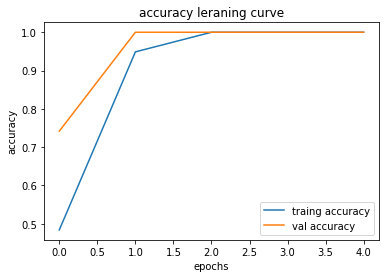

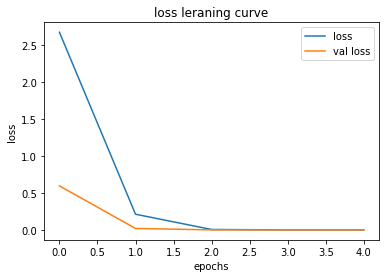

In [ ]:
def plot_learing_curve(tr):
    import matplotlib.pyplot as plt

    train_accuracy=tr.history['accuracy']
    val_accuracy=tr.history['val_accuracy']
    epoch=tr.epoch
    loss=tr.history['loss']
    val_loss=tr.history['val_loss']

    plt.plot(epoch,train_accuracy,label='traing accuracy')
    plt.plot(epoch,val_accuracy,label='val accuracy')

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('accuracy leraning curve')
    plt.legend()
    plt.show()

    plt.plot(epoch,loss,label='loss')
    plt.plot(epoch,val_loss,label='val loss')

    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('loss leraning curve')
    plt.legend()
    plt.show()

plot_learing_curve(tr)

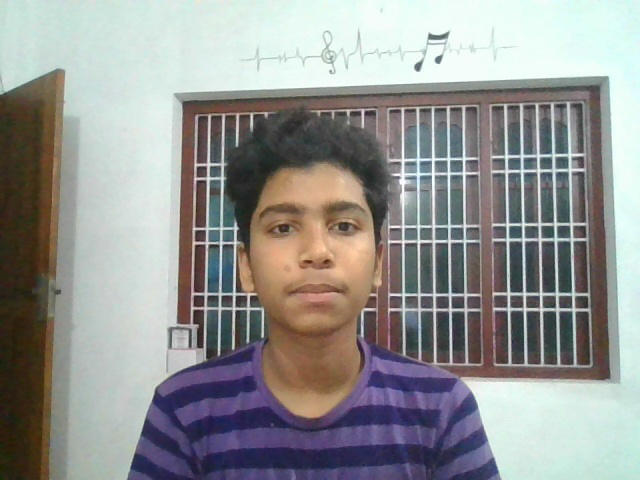

In [ ]:
#SOORAJ:7
from PIL import Image
Image.open("/content/drive/MyDrive/sachu2.jpg")

In [ ]:
import cv2
img_arr=cv2.imread("/content/drive/MyDrive/sachu2.jpg")
test_set=[]
img_arr=cv2.resize(img_arr,(224,224))
img_arr=img_arr/255
np.max(img_arr)
img_arr=img_arr.reshape(224,224,3,1)
test_set.append(img_arr)
# test_set

In [ ]:
test=np.array(test_set)
# test

In [ ]:
test.shape

(1, 224, 224, 3, 1)

In [ ]:
result=model.predict(test)
result

array([[5.7121744e-13, 5.0657450e-10, 9.9552131e-01, 9.2449346e-07,
        3.7338987e-07, 1.8391640e-08, 4.4773472e-03, 1.2104194e-11]],
      dtype=float32)

In [ ]:
np.argmax(result)

2

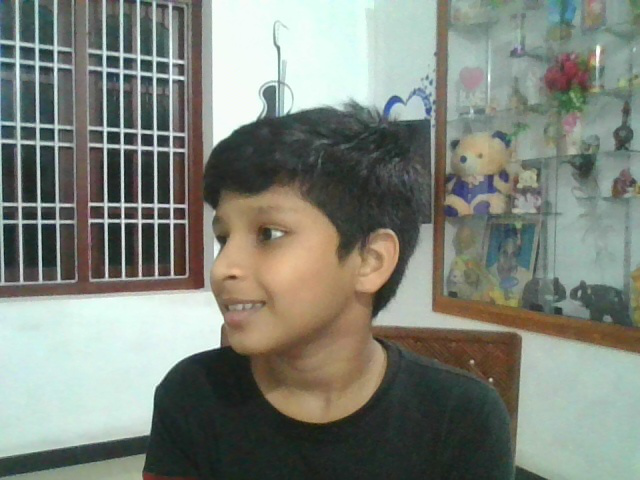

In [ ]:
#APPUS:3
from PIL import Image
Image.open("/content/drive/MyDrive/appu22.jpg")

In [ ]:
import cv2
img_arr=cv2.imread("/content/drive/MyDrive/appu22.jpg")
test_set=[]
img_arr=cv2.resize(img_arr,(224,224))
img_arr=img_arr/255
np.max(img_arr)
img_arr=img_arr.reshape(224,224,3,1)
test_set.append(img_arr)
test=np.array(test_set)

In [ ]:
test.shape

(1, 224, 224, 3, 1)

In [ ]:
result=model.predict(test)
np.argmax(result)

2

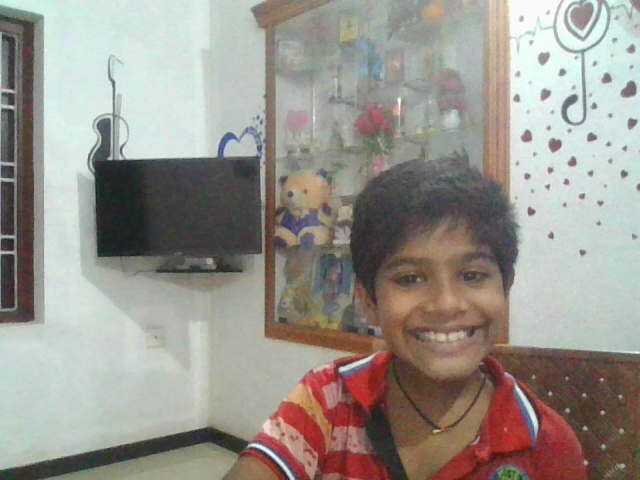

In [ ]:
#ACHU :0
from PIL import Image
Image.open("/content/drive/MyDrive/achu62.jpg")

In [ ]:
import cv2
img_arr=cv2.imread("/content/drive/MyDrive/achu62.jpg")
test_set=[]
img_arr=cv2.resize(img_arr,(224,224))
img_arr=img_arr/255
np.max(img_arr)
img_arr=img_arr.reshape(224,224,3,1)
test_set.append(img_arr)
test=np.array(test_set)

In [ ]:
result=model.predict(test)
np.argmax(result)

2

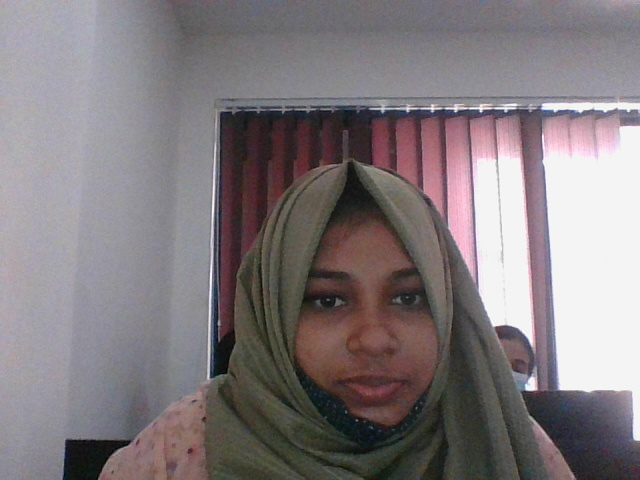

In [ ]:
#AYISHU :4
from PIL import Image
Image.open("/content/drive/MyDrive/frame images0.jpg")

In [ ]:
import cv2
img_arr=cv2.imread("/content/drive/MyDrive/frame images0.jpg")
test_set=[]
img_arr=cv2.resize(img_arr,(224,224))
img_arr=img_arr/255
np.max(img_arr)
img_arr=img_arr.reshape(224,224,3,1)
test_set.append(img_arr)
test=np.array(test_set)

In [ ]:
result=model.predict(test)
np.argmax(result)

2

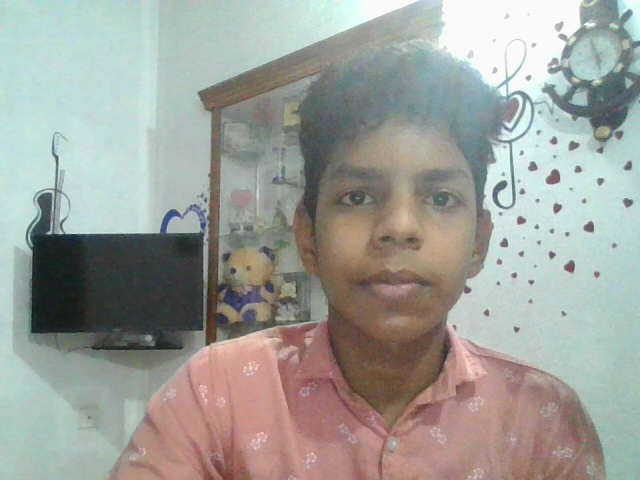

In [ ]:

#ANASWAR:2
from PIL import Image
Image.open("/content/drive/MyDrive/sachu22.jpg")


In [ ]:
import cv2
img_arr=cv2.imread("/content/drive/MyDrive/sachu22.jpg")
test_set=[]
img_arr=cv2.resize(img_arr,(224,224))
img_arr=img_arr/255
np.max(img_arr)
img_arr=img_arr.reshape(224,224,3,1)
test_set.append(img_arr)
test=np.array(test_set)
result=model.predict(test)
np.argmax(result)

2

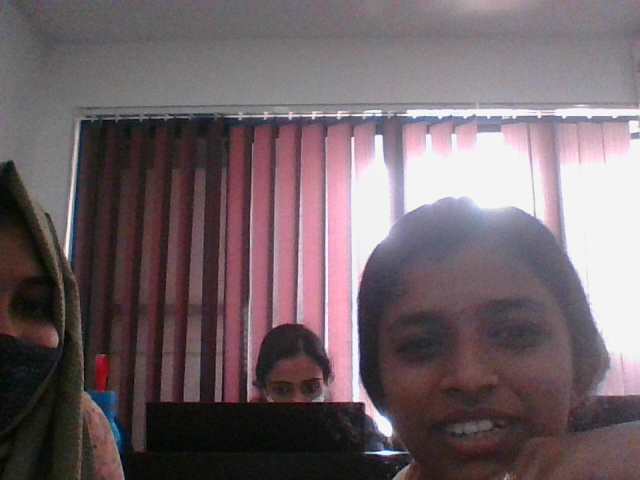

In [ ]:
#AMMU:1
from PIL import Image
Image.open("/content/drive/MyDrive/frame images133.png")

In [ ]:
import cv2
img_arr=cv2.imread("/content/drive/MyDrive/frame images133.png")
test_set=[]
img_arr=cv2.resize(img_arr,(224,224))
img_arr=img_arr/255
np.max(img_arr)
img_arr=img_arr.reshape(224,224,3,1)
test_set.append(img_arr)
test=np.array(test_set)
result=model.predict(test)
np.argmax(result)

2